In [ ]:
# Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
import shap
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('/content/ctu_df.csv')

In [ ]:
df.columns


Index(['ID', 'pH', 'BDecf', 'pCO2', 'BE', 'Apgar1', 'Apgar5', 'Gest. Weeks',
       'Weight(g)', 'Sex', 'Age', 'Gravidity', 'Parity', 'Diabetes',
       'Hypertension', 'Preeclampsia', 'Liq.', 'Pyrexia', 'Meconium',
       'Presentation', 'Induced', 'I.stage', 'NoProgress', 'CK/KP', 'II.stage',
       'Deliv. type', 'dbID', 'Rec. type', 'Pos. II.st.', 'Sig2Birth',
       'Mean_FHR', 'Mean_UC', 'Median_FHR', 'Median_UC', 'Std_FHR', 'Std_UC',
       'RMS_FHR', 'RMS_UC', 'Peak_to_RMS_FHR', 'Peak_to_RMS_UC', 'Peak_FHR',
       'Peak_UC', 'target'],
      dtype='object')

In [ ]:
drop_cols = ['ID', 'dbID', 'Rec. type', 'Pos. II.st.', 'Sig2Birth', 'target']
X = df.drop(columns=drop_cols)
y = df['target']

In [ ]:
# Drop columns with any null values
X = X.dropna(axis=1)

In [ ]:
# Save feature names for later use
feature_names = X.columns.tolist()


In [ ]:
# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Standardize features (optional for XGBoost, but helps if large scale differences)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Train XGBoost classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_scaled, y_train_resampled)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:52:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# SHAP values calculation
explainer = shap.Explainer(xgb, feature_names=feature_names)
shap_values = explainer(X_test_scaled)

Beeswarm plot for Normal (Class 1)


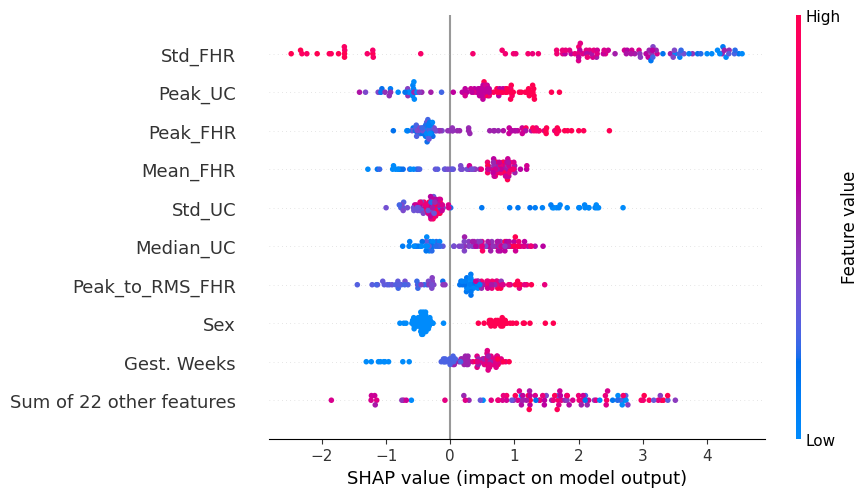

Beeswarm plot for Pathological (Class 0)


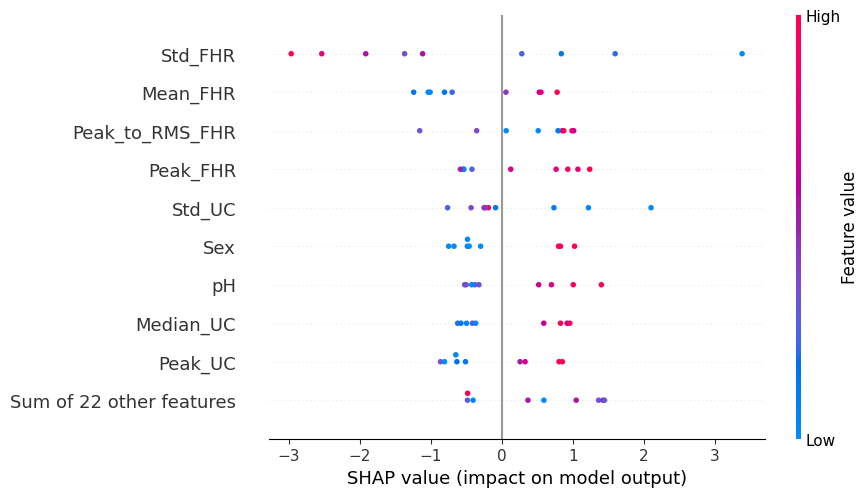

In [ ]:
# Separate SHAP values by class
shap_values_normal = shap_values[y_test.values == 1]
shap_values_pathological = shap_values[y_test.values == 0]

# Beeswarm plot for Normal
print("Beeswarm plot for Normal (Class 1)")
shap.plots.beeswarm(shap_values_normal)
plt.show()

# Beeswarm plot for Pathological
print("Beeswarm plot for Pathological (Class 0)")
shap.plots.beeswarm(shap_values_pathological)
plt.show()